# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
os.environ.clear()
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()
btc_price = response_data_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()
eth_price = response_data_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} based on a BTC price of {btc_price}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} based on an ETH price of {eth_price}")

The current value of your 1.2 BTC is $36650.40 based on a BTC price of 30542.0
The current value of your 5.3 ETH is $6672.17 based on an ETH price of 1258.9


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca api key type: {type(alpaca_api_key)}")
print(f"Alpaca secret key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca api key type: <class 'str'>
Alpaca secret key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
closing_prices_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
closing_prices_df

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-25 00:00:00-05:00  117.39  117.56  117.36  117.54  3977366  383.67   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-25 00:00:00-05:00  384.77  378.46  384.4  61090775

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(closing_prices_df['AGG']['close'])
spy_close_price = float(closing_prices_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.54
Current SPY closing price: $384.4


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19220.00
The current value of your 200 AGG shares is $23508.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value

data = {'amount' : [my_crypto, my_shares]}
index = ['crypto', 'shares']

df_savings = pd.DataFrame(data, index=index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,43322.57
shares,42728.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

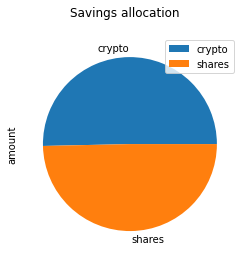

In [14]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title='Savings allocation')

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
my_savings = my_crypto + my_shares

# Validate saving health
if my_savings > emergency_fund:
    print(f"Congrats! Your savings of ${my_savings:0.2f} exceeds emergency fund of ${emergency_fund:0.2f}")
elif my_savings == emergency_fund:
    print(f"Congrats! Your savings of ${my_savings:0.2f} matches your emergency fund of ${emergency_fund:0.2f}")
else: 
    print(f"Your savings of ${my_savings:0.2f} is short of ${emergency_fund - my_savings:0.2f} to achieve your goal of ${emergency_fund:0.2f}")    

Congrats! Your savings of $86050.57 exceeds emergency fund of $36000.00


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2011-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2011-01-25 00:00:00-05:00  105.57  105.9300  105.48  105.850   450927.0   
2011-01-26 00:00:00-05:00  105.74  105.7800  105.51  105.557   542836.0   
2011-01-27 00:00:00-05:00  105.64  105.7501  105.52  105.730   422093.0   
2011-01-28 00:00:00-05:00  105.59  105.9700  105.58  105.840   607012.0   
2011-01-31 00:00:00-05:00  105.85  105.9400  105.59  105.670  1514824.0   
...                           ...       ...     ...      ...        ...   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.22  117.410  5057257.0   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.31  117.400  3877734.0   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.260  5801029.0   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.19  117.260  3469745.0   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.36  117.540  3977366.0   

                              SPY                                        
                             open      high      low   close     volume  
time                                                                     
2011-01-25 00:00:00-05:00  128.75  129.2800  128.110  129.14  145922682  
2011-01-26 00:00:00-05:00  129.49  130.0500  129.230  129.67  115993932  
2011-01-27 00:00:00-05:00  129.70  130.2100  129.470  130.02  100169887  
2011-01-28 00:00:00-05:00  130.14  130.3500  127.510  127.69  235476101  
2011-01-31 00:00:00-05:00  128.07  128.7800  127.750  128.67  125255715  
...                           ...       ...      ...     ...        ...  
2021-01-19 00:00:00-05:00  378.34  379.2300  376.750  378.63   42257108  
2021-01-20 00:00:00-05:00  381.11  384.7900  380.690  383.86   53064901  
2021-01-21 00:00:00-05:00  384.49  384.9500  383.250  384.20   41800991  
2021-01-22 00:00:00-05:00  382.25  384.1256  381.835  382.86   39108239  
2021-01-25 00:00:00-05:00  383.67  384.7700  378.460  384.40   61090775  

[2517 rows x 10 columns]

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_30yrs = MCSimulation (
        portfolio_data = df_stock_data,
        weights = [.40, .60],
        num_simulation = num_sims,
        num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_30yrs.portfolio_data

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2011-01-25 00:00:00-05:00  105.57  105.9300  105.48  105.850   450927.0   
2011-01-26 00:00:00-05:00  105.74  105.7800  105.51  105.557   542836.0   
2011-01-27 00:00:00-05:00  105.64  105.7501  105.52  105.730   422093.0   
2011-01-28 00:00:00-05:00  105.59  105.9700  105.58  105.840   607012.0   
2011-01-31 00:00:00-05:00  105.85  105.9400  105.59  105.670  1514824.0   
...                           ...       ...     ...      ...        ...   
2021-01-19 00:00:00-05:00  117.27  117.4200  117.22  117.410  5057257.0   
2021-01-20 00:00:00-05:00  117.35  117.4300  117.31  117.400  3877734.0   
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.260  5801029.0   
2021-01-22 00:00:00-05:00  117.29  117.3200  117.19  117.260  3469745.0   
2021-01-25 00:00:00-05:00  117.39  117.5600  117.36  117.540  3977366.0   

                                           SPY                             \
                          daily_return    open      high      low   close   
time                                                                        
2011-01-25 00:00:00-05:00          NaN  128.75  129.2800  128.110  129.14   
2011-01-26 00:00:00-05:00    -0.002768  129.49  130.0500  129.230  129.67   
2011-01-27 00:00:00-05:00     0.001639  129.70  130.2100  129.470  130.02   
2011-01-28 00:00:00-05:00     0.001040  130.14  130.3500  127.510  127.69   
2011-01-31 00:00:00-05:00    -0.001606  128.07  128.7800  127.750  128.67   
...                                ...     ...       ...      ...     ...   
2021-01-19 00:00:00-05:00     0.001279  378.34  379.2300  376.750  378.63   
2021-01-20 00:00:00-05:00    -0.000085  381.11  384.7900  380.690  383.86   
2021-01-21 00:00:00-05:00    -0.001193  384.49  384.9500  383.250  384.20   
2021-01-22 00:00:00-05:00     0.000000  382.25  384.1256  381.835  382.86   
2021-01-25 00:00:00-05:00     0.002388  383.67  384.7700  378.460  384.40   

                                                   
                              volume daily_return  
time                                               
2011-01-25 00:00:00-05:00  145922682          NaN  
2011-01-26 00:00:00-05:00  115993932     0.004104  
2011-01-27 00:00:00-05:00  100169887     0.002699  
2011-01-28 00:00:00-05:00  235476101    -0.017920  
2011-01-31 00:00:00-05:00  125255715     0.007675  
...                              ...          ...  
2021-01-19 00:00:00-05:00   42257108     0.007852  
2021-01-20 00:00:00-05:00   53064901     0.013813  
2021-01-21 00:00:00-05:00   41800991     0.000886  
2021-01-22 00:00:00-05:00   39108239    -0.003488  
2021-01-25 00:00:00-05:00   61090775     0.004022  

[2517 rows x 12 columns]

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013971,1.004933,0.998388,1.011185,1.003441,1.005787,0.997154,0.995705,1.002935,0.999215,...,0.993535,0.997384,1.002720,1.007203,1.000434,0.994854,1.007929,1.000848,0.990185,1.011709
2,1.018986,1.014179,1.005826,1.001908,1.006297,1.003145,1.001566,1.011595,1.024462,1.004572,...,0.986618,1.013413,0.999028,1.000632,0.995660,1.003481,1.006930,0.997395,0.999193,1.008293
3,1.019119,1.011848,1.002159,1.010340,1.004068,1.010595,1.015378,1.021052,1.038707,1.004658,...,0.995834,1.026379,1.005786,1.001012,0.986433,1.014201,1.004146,1.013759,0.995848,0.997363
4,1.024319,1.009330,0.996405,1.014103,1.000364,1.012608,1.001823,1.018275,1.038827,1.007778,...,1.003545,1.026633,1.004394,0.996814,0.994109,1.022087,0.996638,1.001116,0.999300,1.002754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.485339,9.395517,19.534445,7.271288,7.305825,5.427942,3.526570,7.933352,8.906875,13.543810,...,43.641123,18.130753,3.405683,10.450972,11.615782,3.046038,13.048489,8.165097,6.137402,3.281188
7557,6.501932,9.388200,19.572654,7.256322,7.284366,5.413588,3.497182,7.993494,8.886931,13.444710,...,43.873367,18.285086,3.418603,10.411130,11.619102,3.080715,13.018172,8.112121,6.167412,3.324152
7558,6.403327,9.331828,19.680840,7.219985,7.312139,5.495743,3.504759,8.021773,8.958472,13.401109,...,43.384158,18.115932,3.411839,10.459090,11.523373,3.054995,12.977378,8.060382,6.198323,3.302245
7559,6.335003,9.387136,19.399607,7.235060,7.318009,5.568357,3.513457,7.973298,8.999928,13.368997,...,44.152737,18.087833,3.366362,10.450144,11.464907,3.067579,12.916269,8.167715,6.196136,3.319504


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

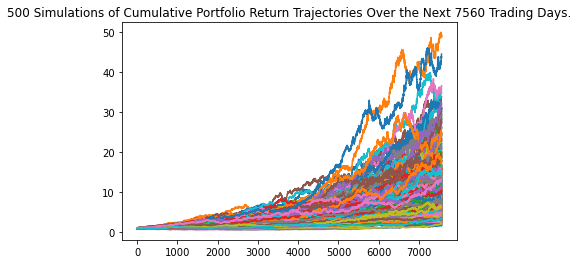

In [21]:
# Plot simulation outcomes
MC_30yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

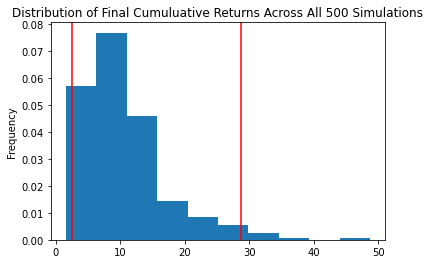

In [22]:
# Plot probability distribution and confidence intervals
MC_30yrs.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30yrs_summary = MC_30yrs.summarize_cumulative_return()

# Print summary statistics
MC_30yrs_summary

count           500.000000
mean             10.602319
std               6.807704
min               1.583871
25%               6.030420
50%               8.879057
75%              13.136271
max              48.722762
95% CI Lower      2.483643
95% CI Upper     28.707212
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * MC_30yrs_summary['95% CI Lower']
ci_upper = initial_investment * MC_30yrs_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $49672.86 and $574144.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * MC_30yrs_summary['95% CI Lower']
ci_upper = initial_investment * MC_30yrs_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.02f} and ${ci_upper:.02f}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $74509.29 and $861216.35


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 250

MC_5yrs = MCSimulation (
        portfolio_data = df_stock_data,
        weights = [.10, .90],
        num_simulation = num_sims,
        num_trading_days = 252*5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989126,1.003503,1.008969,1.025500,0.985006,0.992136,0.993454,1.006694,0.989290,1.000353,...,0.998398,1.004567,1.014402,0.991756,0.992592,1.016925,1.015617,0.990711,1.014239,0.989297
2,0.984762,1.003563,1.017942,1.032196,0.969528,0.998722,0.995197,0.981244,0.985628,1.004617,...,0.992954,1.010098,1.001653,0.988638,0.980340,1.006311,1.029539,0.985165,1.016955,0.984880
3,0.980303,0.993736,1.037288,1.038497,0.973116,1.006717,1.015015,0.978756,1.002933,1.007423,...,0.990563,1.012052,0.994735,0.998352,0.973026,1.003374,1.021411,0.980711,1.011578,0.963287
4,0.974585,0.988942,1.047311,1.032631,0.984390,1.009995,1.011681,0.978383,0.995984,1.021634,...,0.985812,0.995391,0.992373,0.987107,0.976622,1.000992,1.029726,0.987205,1.003228,0.953039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.821190,0.755454,1.812815,1.270595,0.868477,1.425855,2.177239,2.231451,1.830218,1.811857,...,1.436588,1.233021,1.793267,2.030462,1.097342,1.475024,2.013075,2.200574,1.295760,1.966069
1257,1.834457,0.754790,1.806478,1.288237,0.855371,1.411723,2.195841,2.238541,1.819099,1.836053,...,1.418152,1.227352,1.784632,2.044750,1.086500,1.464394,2.039963,2.142142,1.304055,1.994709
1258,1.845152,0.760188,1.789931,1.279745,0.860361,1.416080,2.223972,2.252347,1.809080,1.831516,...,1.405094,1.242383,1.781251,2.061179,1.094496,1.464051,2.051751,2.161334,1.311734,1.983927
1259,1.833361,0.756596,1.767553,1.300983,0.859176,1.411605,2.200642,2.242308,1.831476,1.875162,...,1.432237,1.234360,1.759329,2.057634,1.104864,1.479683,2.031699,2.123305,1.329206,1.982435


<AxesSubplot:title={'center':'250 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

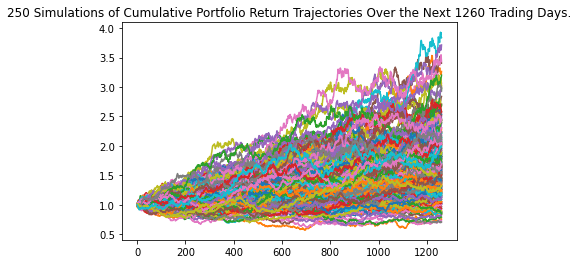

In [29]:
# Plot simulation outcomes
MC_5yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 250 Simulations'}, ylabel='Frequency'>

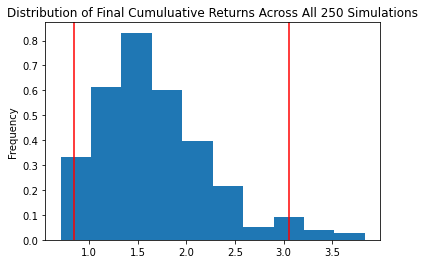

In [30]:
# Plot probability distribution and confidence intervals
MC_5yrs.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5yrs_summary = MC_5yrs.summarize_cumulative_return()

# Print summary statistics
MC_5yrs_summary

count           250.000000
mean              1.674682
std               0.573401
min               0.708426
25%               1.263651
50%               1.596738
75%               1.982976
max               3.836008
95% CI Lower      0.847742
95% CI Upper      3.055978
Name: 1260, dtype: float64

In [32]:
# Set initial investment
initial_investment = 250000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment * MC_5yrs_summary['95% CI Lower']
ci_upper_five = initial_investment * MC_5yrs_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:.02f} and ${ci_upper_five:.02f}")

There is a 95% chance that an initial investment of $250000 in the portfolio over the next 5 years will end within in the range of $211935.52 and $763994.52


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 250

MC_10yrs = MCSimulation (
        portfolio_data = df_stock_data,
        weights = [.20, .80],
        num_simulation = num_sims,
        num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981684,1.007650,0.994559,1.006323,0.980578,1.004704,1.002225,0.999668,0.984006,0.999043,...,1.006596,1.002309,1.003858,0.991290,0.999890,0.994644,0.996475,1.016432,0.993875,1.013351
2,0.978385,0.995196,1.007461,1.003407,0.978743,1.006396,1.006082,0.996109,0.967100,0.989255,...,1.000887,1.002415,1.004133,0.984951,1.002635,0.988810,1.001359,1.007933,0.991260,1.010070
3,0.975041,0.993790,0.997203,1.010237,0.974239,0.996536,1.011133,1.012867,0.971499,1.012313,...,0.996416,1.011866,1.004726,0.982086,1.008018,0.974276,1.018927,1.021133,0.992489,0.999634
4,0.982415,0.998208,0.983507,0.998540,0.986707,1.011779,1.012716,1.009920,0.988590,1.032104,...,0.996667,1.011618,1.008603,0.992839,1.023655,0.963709,1.004085,1.026544,0.988395,0.989552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.563200,1.741347,1.761657,1.609303,3.000936,3.640654,1.395632,3.251117,1.843187,1.154873,...,2.492340,2.233674,1.344678,1.597043,2.487620,2.003850,5.462516,2.889006,2.686841,2.139600
2517,1.554797,1.755313,1.763609,1.641915,2.975424,3.599008,1.393915,3.312120,1.837089,1.168774,...,2.509179,2.260068,1.357044,1.589333,2.530243,2.036788,5.521997,2.874282,2.700031,2.143653
2518,1.555676,1.749218,1.786203,1.651198,3.001993,3.591089,1.399747,3.331997,1.864041,1.176374,...,2.536967,2.244735,1.379877,1.592071,2.527590,2.040703,5.523413,2.862461,2.732258,2.149842
2519,1.537803,1.768087,1.795542,1.707188,2.997322,3.631219,1.383935,3.305074,1.852664,1.182632,...,2.550918,2.230322,1.377610,1.582257,2.514473,2.057835,5.488844,2.884805,2.722000,2.132819


<AxesSubplot:title={'center':'250 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

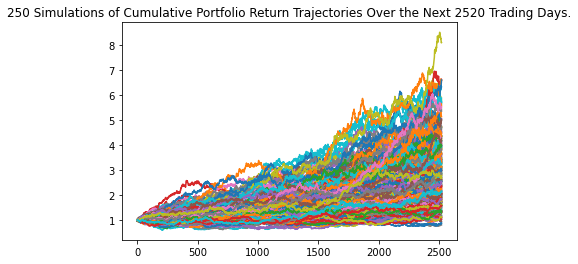

In [35]:
# Plot simulation outcomes
MC_10yrs.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 250 Simulations'}, ylabel='Frequency'>

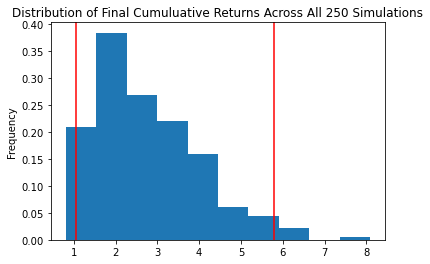

In [36]:
# Plot probability distribution and confidence intervals
MC_10yrs.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10yrs_summary = MC_10yrs.summarize_cumulative_return()

# Print summary statistics
MC_10yrs_summary

count           250.000000
mean              2.774424
std               1.288746
min               0.810046
25%               1.829588
50%               2.536129
75%               3.488718
max               8.091798
95% CI Lower      1.062146
95% CI Upper      5.796219
Name: 2520, dtype: float64

In [39]:
# Set initial investment
initial_investment = 250000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * MC_10yrs_summary['95% CI Lower']
ci_upper_ten = initial_investment * MC_10yrs_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:.02f} and ${ci_upper_ten:.02f}")

There is a 95% chance that an initial investment of $250000 in the portfolio over the next 10 years will end within in the range of $265536.52 and $1449054.86
